# Trabajo práctico 
## _Aprendizaje de Máquina I_
## CEIA Co13

### Alumno:
- Ferrán, Natanael Emir

### Dataset:
- [Water Quality](https://www.kaggle.com/datasets/adityakadiwal/water-potability/)
- **Licencia:** *Data files © Original Authors*
- **Autor:** *fedesoriano*

### A resolver:
- Clasificar distintas aguas en potables y no potables

### Técnicas utilizadas:
- Logistic Regression
- KNC
- Random forest
- Support Vector Machines

***

## Importación de librerías esenciales y lectura del dataset

In [1]:
# importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the file

url= 'https://raw.githubusercontent.com/nferran/tp_aprendizaje_de_maquina_I/main/water_potability.csv'
df= pd.read_csv(url)

## Análisis exploratorio inicial

In [3]:
# showing first 5 rows

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# checking dataframe's shape

df.shape

(3276, 10)

In [5]:
# showing a summary of numeric features

numeric_columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
df[numeric_columns].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [6]:
# showing features' types

df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
# checking target data balance

df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot: xlabel='Potability', ylabel='Count'>

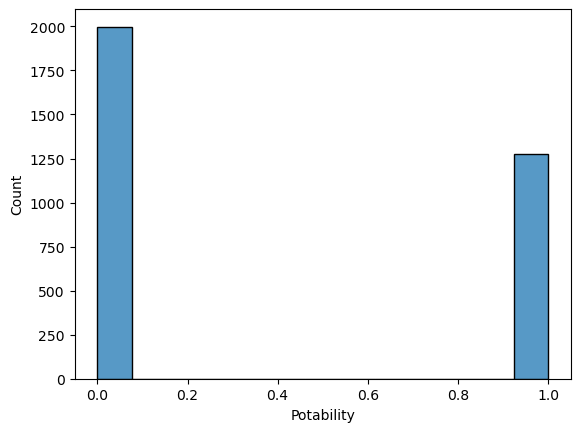

In [8]:
# plotting target data balance

sns.histplot(x= df.Potability) 

In [9]:
# checking distributions' skewness

print(f'ph distribution skewness: {df.ph.skew():.2f}')
print(f'Hardness distribution skewness: {df.Hardness.skew():.2f}')
print(f'Solids distribution skewness: {df.Solids.skew():.2f}')
print(f'Chloramines distribution skewness: {df.Chloramines.skew():.2f}')
print(f'Sulfate distribution skewness: {df.Sulfate.skew():.2f}')
print(f'Conductivity distribution skewness: {df.Conductivity.skew():.2f}')
print(f'Organic_carbon distribution skewness: {df.Organic_carbon.skew():.2f}')
print(f'Trihalomethanes distribution skewness: {df.Trihalomethanes.skew():.2f}')
print(f'Turbidity distribution skewness: {df.Turbidity.skew():.2f}')

ph distribution skewness: 0.03
Hardness distribution skewness: -0.04
Solids distribution skewness: 0.62
Chloramines distribution skewness: -0.01
Sulfate distribution skewness: -0.04
Conductivity distribution skewness: 0.26
Organic_carbon distribution skewness: 0.03
Trihalomethanes distribution skewness: -0.08
Turbidity distribution skewness: -0.01


In [10]:
# calculate Pearson correlation coefficients between features

corr= df[numeric_columns].corr(method='pearson')

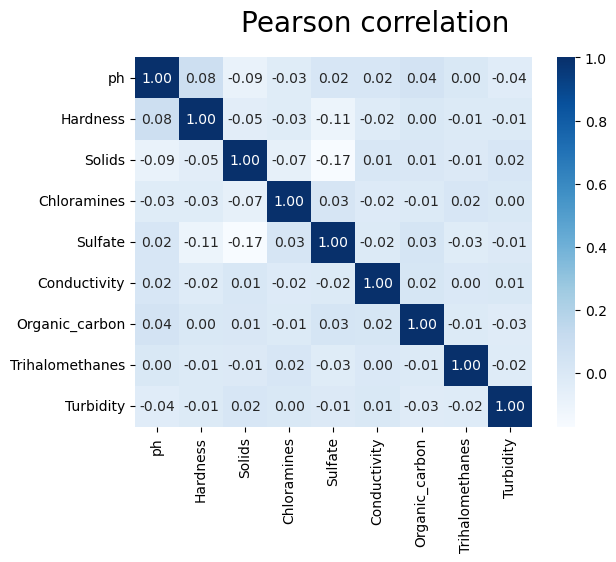

In [11]:
# plotting Pearson correlation coefficients between features

sns.heatmap(corr, cmap= 'Blues', annot= True, fmt= ".2f")

plt.suptitle('Pearson correlation', fontsize= 20)
plt.show()

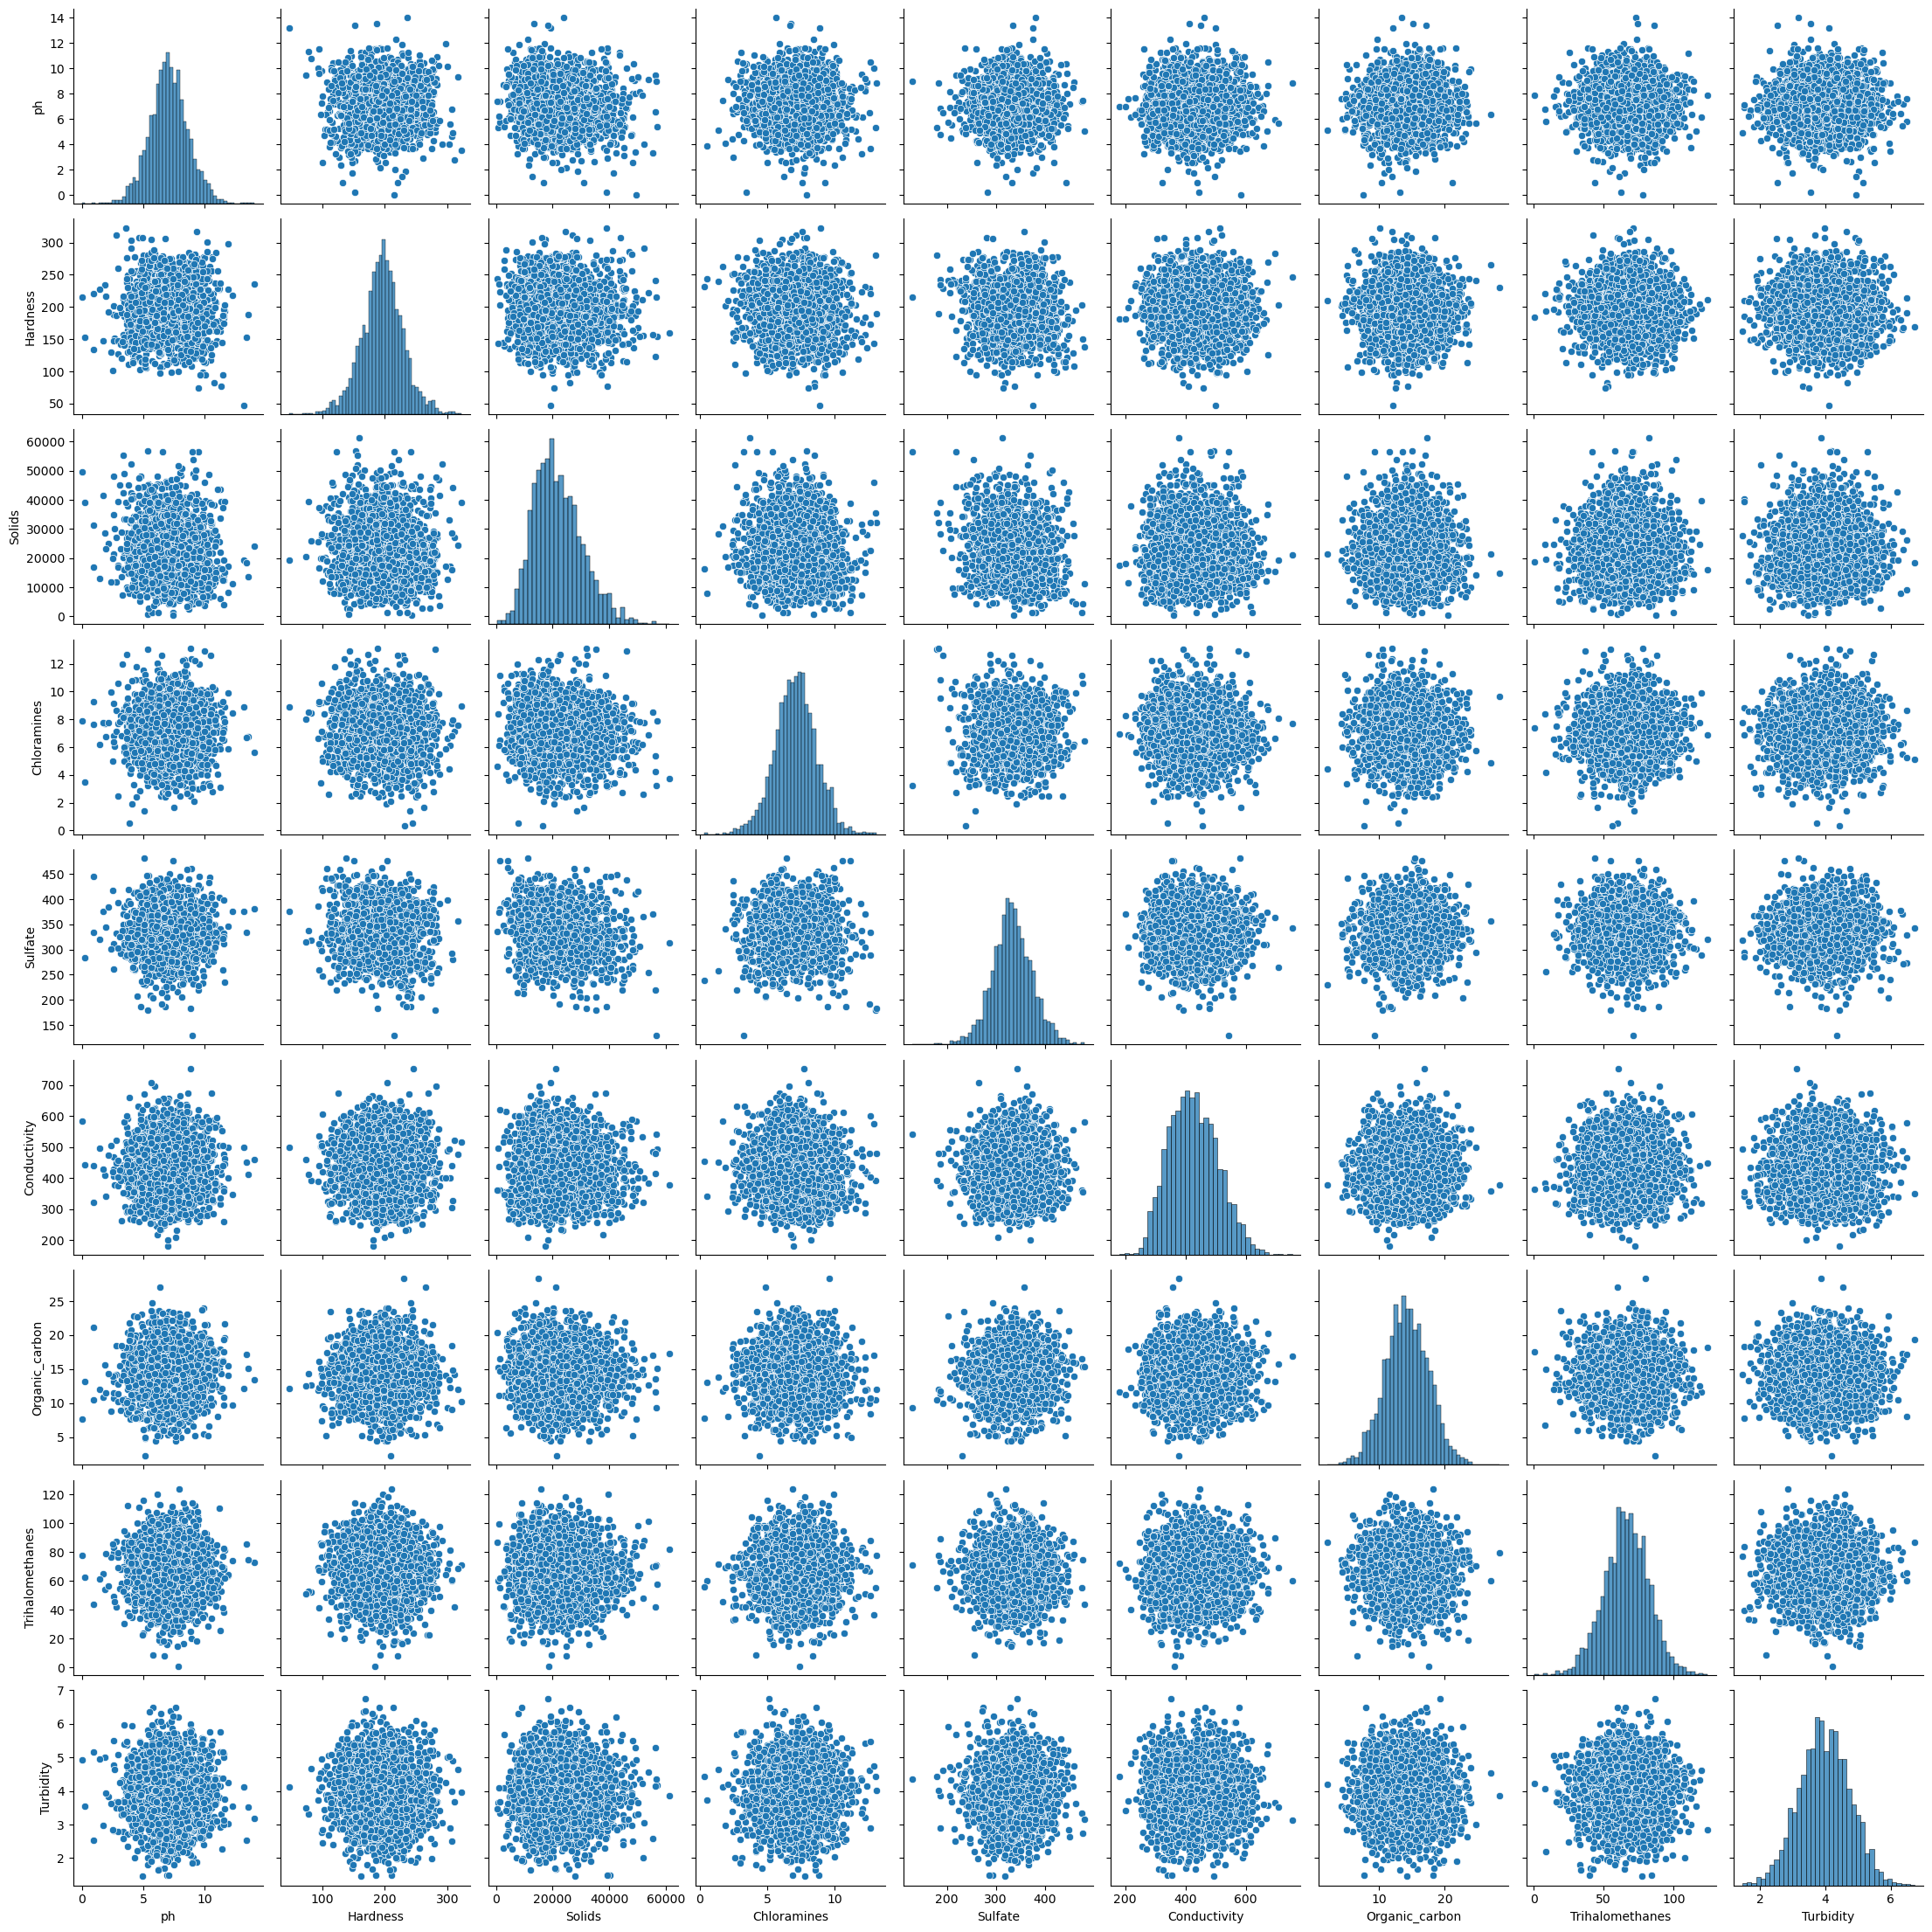

In [12]:
# plotting every feature distribution

sns.pairplot(df[numeric_columns])

## Preparación de datos

### Tratamiento de datos faltantes

In [13]:
# checking missing data in the entire dataset

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [14]:
# checking ph missing values

ph_missing_values= df.ph.isnull().sum()
total_values= len(df)

ph_missing_values_perc= ( ph_missing_values/total_values) * 100

print(f'We are missing {ph_missing_values_perc:.2f}% of ph values.')

We are missing 14.99% of ph values.


In [15]:
# checking Sulfate missing values

Sulfate_missing_values= df.Sulfate.isnull().sum()

Sulfate_missing_values_perc= (Sulfate_missing_values/total_values) * 100

print(f'We are missing {Sulfate_missing_values_perc:.2f}% of Sulfate values.')

We are missing 23.84% of Sulfate values.


In [16]:
# checking Trihalomethanes missing values

Trihalomethanes_missing_values= df.Trihalomethanes.isnull().sum()

Trihalomethanes_missing_values_perc= (Trihalomethanes_missing_values/total_values) * 100

print(f'We are missing {Trihalomethanes_missing_values_perc:.2f}% of Trihalomethanes values.')

We are missing 4.95% of Trihalomethanes values.


In [17]:
# imputing with mean

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df_Trihalomethanes= df.Trihalomethanes.to_frame()

df_Trihalomethanes_imputed= imputer.fit_transform(df_Trihalomethanes)

df_Trihalomethanes_imputed= pd.DataFrame(df_Trihalomethanes_imputed, columns= df_Trihalomethanes.columns)

df_inputs= df[numeric_columns].drop(['Trihalomethanes'], axis= 1)
df_inputs= pd.concat([df_inputs, df_Trihalomethanes_imputed], axis= 1)

In [18]:
# re-checking missing values

df_inputs.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Turbidity            0
Trihalomethanes      0
dtype: int64

In [19]:
# imputing with MICE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer= IterativeImputer(max_iter=10000, n_nearest_features= df_inputs.shape[1])

imputed_data= mice_imputer.fit_transform(df_inputs[['ph','Sulfate']])

df_mice_imputed= pd.DataFrame(imputed_data, columns= ['ph','Sulfate'])

df_inputs= df_inputs.drop(['ph','Sulfate'], axis= 1)
df_inputs= pd.concat([df_inputs, df_mice_imputed], axis= 1)

In [20]:
# re-checking missing values

df_inputs.isna().sum()

Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Turbidity          0
Trihalomethanes    0
ph                 0
Sulfate            0
dtype: int64

### Transformación de variables

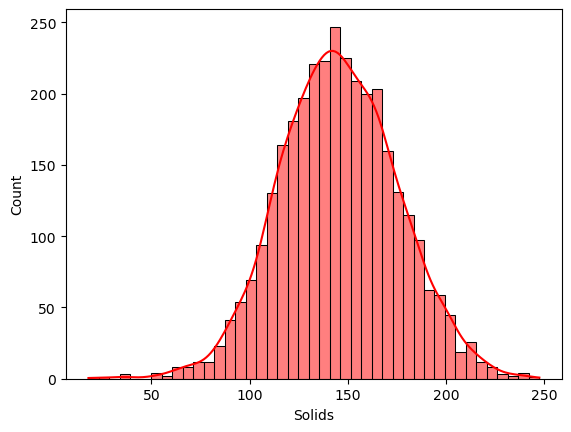

In [21]:
# cheking square root transformation for Solids feature

sns.histplot(x= df.Solids.apply(np.sqrt), kde= True, color='r') 
plt.show()

In [22]:
# checking transformation skewness

df.Solids.apply(np.sqrt).skew()

-0.015157793420941885

In [23]:
# applying and saving transformation 

df.Solids= df.Solids.apply(np.sqrt)

### Separación de train/test sets y normalización

In [24]:
# data splitting

from sklearn.model_selection import train_test_split

X = df_inputs
Y = df.Potability

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.7)

In [25]:
# using standardization for scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled, columns= X_train.columns)

X_test_scaled= scaler.transform(X_test)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Entrenamiento de modelos

In [26]:
# Importing essential libraries

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# In each CV step, we'll choose the best model using f_beta criteria.
# beta value is gonna be less than zero, in order to priorize precision: 
# In this case, we really need to avoid false positives (it is dangerous to label a water as potable if it is not)

beta_value= 0.5

### Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

LR_model= LogisticRegression(random_state= 42, class_weight= "balanced")
LR_model.fit(X_train_scaled,Y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [29]:
train_predictions = LR_model.predict(X_train_scaled)
test_predictions = LR_model.predict(X_test_scaled)

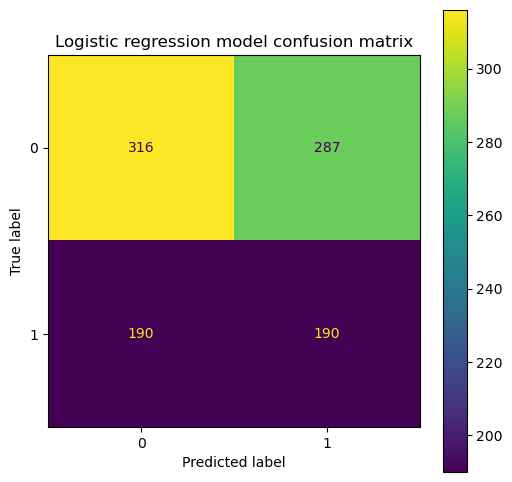

In [30]:
LR_model_matrix= confusion_matrix(Y_test, test_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix= LR_model_matrix,
                              display_labels= LR_model.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title('Logistic regression model confusion matrix')

plt.show()

In [31]:
from sklearn.metrics import fbeta_score

fbeta_score(Y_test, test_predictions, beta= beta_value)

0.4152097902097902

### KNC

In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNC_model= KNeighborsClassifier()

custom_scorer= make_scorer(fbeta_score, beta= beta_value)

KNC_grid = GridSearchCV(KNC_model,
                    {"n_neighbors": [int(i) for i in np.linspace(1,100,100)]},
                    refit= True,
                    scoring= custom_scorer)

KNC_grid.fit(X_train_scaled, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring=make_scorer(fbeta_score, beta=0.5))

In [33]:
KNC_grid.best_params_

{'n_neighbors': 9}

In [34]:
train_predictions = KNC_grid.predict(X_train_scaled)
test_predictions = KNC_grid.predict(X_test_scaled)

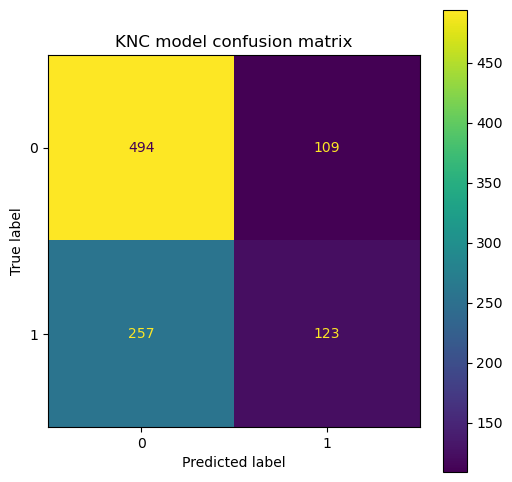

In [35]:
KNC_grid_matrix = confusion_matrix(Y_test, test_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix= KNC_grid_matrix,
                              display_labels= KNC_grid.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title('KNC model confusion matrix')

plt.show()

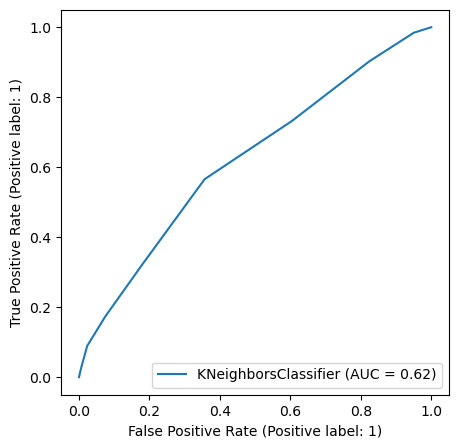

In [36]:
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_estimator(KNC_grid.best_estimator_, X_test_scaled, Y_test, ax=ax)

plt.show()

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

RFC_model= RandomForestClassifier(n_estimators= 200)

custom_scorer= make_scorer(fbeta_score, beta= beta_value)

RFC_random= RandomizedSearchCV(RFC_model,
                    {"max_depth": [int(i) for i in np.linspace(2,100,99)]},
                    refit= True,
                    scoring= custom_scorer,
                    n_iter= 20)

RFC_random.fit(X_train_scaled, Y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=200),
                   n_iter=20,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, ...]},
                   scoring=make_scorer(fbeta_score, beta=0.5))

In [38]:
pd.DataFrame(RFC_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.211659,0.024525,0.033841,0.003641,81,{'max_depth': 81},0.612583,0.539384,0.556569,0.638842,0.522523,0.573980,0.044374,2
1,1.225233,0.029739,0.032278,0.000496,75,{'max_depth': 75},0.591667,0.516304,0.562977,0.617284,0.528757,0.563398,0.037738,7
2,1.202651,0.021819,0.032277,0.000483,87,{'max_depth': 87},0.577586,0.546875,0.553571,0.617496,0.511464,0.561398,0.035141,11
3,1.207191,0.030013,0.032603,0.002810,30,{'max_depth': 30},0.572183,0.501761,0.601145,0.617391,0.514019,0.561300,0.046115,13
4,1.189271,0.021506,0.032026,0.001740,94,{'max_depth': 94},0.591667,0.514184,0.574818,0.613893,0.512334,0.561379,0.041203,12
5,1.203349,0.028595,0.032376,0.001750,95,{'max_depth': 95},0.594406,0.516667,0.568182,0.608229,0.488029,0.555103,0.045857,16
6,1.183095,0.014278,0.031203,0.000549,38,{'max_depth': 38},0.580986,0.521583,0.598958,0.604491,0.513514,0.563906,0.038725,6
7,1.200480,0.015089,0.031389,0.001096,32,{'max_depth': 32},0.592532,0.525362,0.592593,0.573192,0.538033,0.564343,0.027866,5
8,1.193604,0.018773,0.031251,0.000875,71,{'max_depth': 71},0.593972,0.505319,0.539568,0.647986,0.524862,0.562341,0.051981,9
9,1.191819,0.036426,0.030837,0.000681,68,{'max_depth': 68},0.585106,0.512590,0.579710,0.612789,0.517241,0.561487,0.039675,10


In [39]:
train_predictions= RFC_random.predict(X_train_scaled)
test_predictions= RFC_random.predict(X_test_scaled)

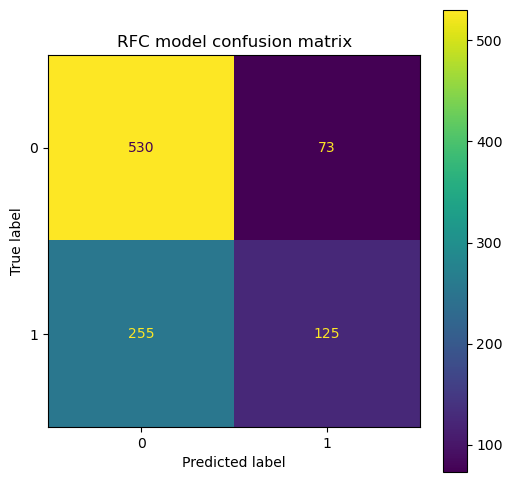

In [40]:
RFC_random_matrix= confusion_matrix(Y_test, test_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix= RFC_random_matrix,
                              display_labels= RFC_random.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title('RFC model confusion matrix')

plt.show()

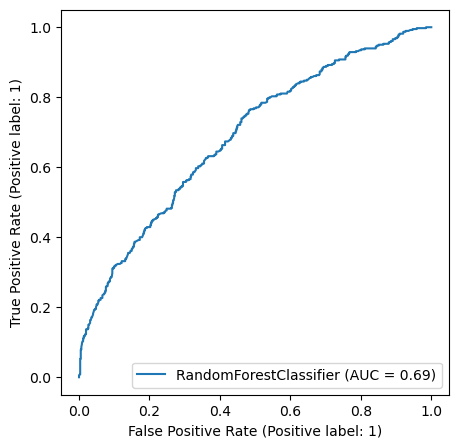

In [41]:
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_estimator(RFC_random.best_estimator_, X_test_scaled, Y_test, ax=ax)

plt.show()

### Support Vector Machines

In [42]:
from sklearn.svm import SVC

SVC_model= SVC()

custom_scorer= make_scorer(fbeta_score, beta= beta_value)

SVC_random= RandomizedSearchCV(SVC_model,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit= True,
                    scoring= custom_scorer,
                    n_iter= 10)

SVC_random.fit(X_train_scaled,Y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                                         'kernel': ['linear']},
                                        {'C': [0.01, 0.1, 1, 5, 10, 100],
                                         'gamma': [0.1, 0.5, 1, 2, 10, 100],
                                         'kernel': ['rbf']},
                                        {'C': [0.01, 0.1, 1, 5, 10, 100],
                                         'degree': [2, 3, 4, 5, 6],
                                         'kernel': ['poly']}],
                   scoring=make_scorer(fbeta_score, beta=0.5))

In [43]:
pd.DataFrame(SVC_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.107997,0.008766,0.031436,0.000303,rbf,0.1,1,NaN,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}",0.572034,0.527523,0.530973,0.594990,0.496760,0.544456,0.034807,1
1,0.149055,0.015059,0.039649,0.001515,rbf,1,10,NaN,"{'kernel': 'rbf', 'gamma': 1, 'C': 10}",0.333333,0.366379,0.351942,0.359223,0.333333,0.348842,0.013461,5
2,0.162944,0.009683,0.016861,0.000601,poly,NaN,10,6,"{'kernel': 'poly', 'degree': 6, 'C': 10}",0.471204,0.504658,0.501645,0.571205,0.474339,0.504610,0.035989,2
3,0.165749,0.006189,0.016187,0.000124,poly,NaN,10,2,"{'kernel': 'poly', 'degree': 2, 'C': 10}",0.540254,0.425258,0.452381,0.576497,0.511983,0.501274,0.055609,3
4,0.137334,0.007568,0.016686,0.000305,poly,NaN,5,6,"{'kernel': 'poly', 'degree': 6, 'C': 5}",0.479651,0.457746,0.476619,0.561313,0.451448,0.485355,0.039472,4
5,0.164265,0.005177,0.040762,0.001166,rbf,10,100,NaN,"{'kernel': 'rbf', 'gamma': 10, 'C': 100}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
6,0.158149,0.010753,0.042059,0.001542,rbf,1,5,NaN,"{'kernel': 'rbf', 'gamma': 1, 'C': 5}",0.333333,0.366379,0.351942,0.359223,0.333333,0.348842,0.013461,5
7,0.171433,0.016763,0.018765,0.000901,poly,NaN,1,3,"{'kernel': 'poly', 'degree': 3, 'C': 1}",0.263158,0.175439,0.228873,0.322581,0.161290,0.230268,0.058940,7
8,0.128639,0.005799,0.020537,0.000639,poly,NaN,0.1,5,"{'kernel': 'poly', 'degree': 5, 'C': 0.1}",0.092593,0.100000,0.120192,0.242291,0.073892,0.125793,0.060107,8
9,0.222967,0.018186,0.019317,0.000898,linear,NaN,5,NaN,"{'kernel': 'linear', 'C': 5}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9


In [44]:
train_predictions= SVC_random.predict(X_train_scaled)
test_predictions= SVC_random.predict(X_test_scaled)

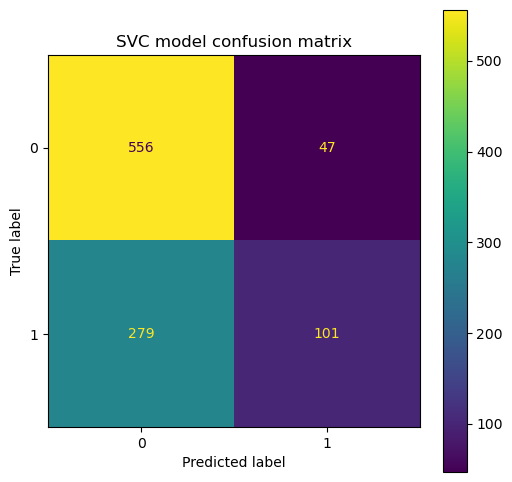

In [45]:
SVC_random_matrix= confusion_matrix(Y_test, test_predictions)

disp= ConfusionMatrixDisplay(confusion_matrix= SVC_random_matrix,
                              display_labels= SVC_random.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title('SVC model confusion matrix')

plt.show()

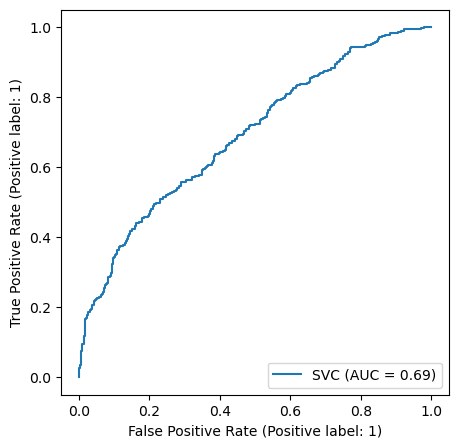

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_estimator(SVC_random.best_estimator_, X_test_scaled, Y_test, ax=ax)

plt.show()